In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import skimage.io, skimage.feature

import os, shutil
import random

from PIL import Image

In [ ]:
!nvidia-smi -L

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-371756d3-4818-3c45-8125-84a1fa1a230a)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***NOTA: Colab recupera de Drive los archivos como se le da la gana, por eso es siempre importante observar que el orden coincida y en su caso, ordernar los datos***

In [ ]:
def Imprimir_Imagenes(Imagenes,n_rows=5,n_cols=5):
    """La siguiente función nos permite imprimir de manera ordenada una cierta cantidad de imagenes"""

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,10))

    if n_rows == 1:
      axes.resize((1,axes.shape[0]))
    if n_cols == 1:
      axes.resize((axes.shape[0],1))

    imgn = 0

    for i in range(len(axes)):

        for j in range(axes.shape[1]):

            axes[i,j].imshow(Imagenes[imgn].reshape(150,150),cmap="gray")
            axes[i,j].set_xticklabels([])
            axes[i,j].set_yticklabels([])

            imgn += 1

    plt.tight_layout()
    plt.show()

***

In [ ]:
import cv2

Clases_Entrenamiento = list()
Imagenes_por_Clase_Entrenamiento = list()

ruta_datos = "/content/drive/MyDrive/Colab Notebooks/TESIS/FM_Dataset/Entrenamiento_v2/"
ruta_fotos_persona = os.listdir(ruta_datos)
ruta_fotos_persona.sort() # Se ordena de forma ascendente con el objetivo de que las etiquetas e imágenes coincidan entre conjuntos (Entrenamiento y Validación).

contador = 0

for clase, ruta_archivos_x_persona in zip([0,1,2,3,4],ruta_fotos_persona):
    
    ruta_frames = os.path.join(ruta_datos, ruta_archivos_x_persona)
    
    frames = os.listdir(ruta_frames)
    random.shuffle(frames)
    
    for frame in frames:
        
        img = cv2.imread(os.path.join(ruta_frames, frame)) # Recuperamos la imagen en formato BGR.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255.0 # Transformamos de BGR a Escala de Grises.
        Imagenes_por_Clase_Entrenamiento.append(img.reshape(img.shape[0],img.shape[1],1)) # Guardamos la imagen ya normalizada y consideramos la dimension channel.
        Clases_Entrenamiento.append(clase) # Guardamos su respectiva clase.
        contador += 1
    print(contador)
    

10000
20000
30000
40018
50027


In [ ]:
import cv2

Clases_Validacion = list()
Imagenes_por_Clase_Validacion = list()

ruta_datos = "/content/drive/MyDrive/Colab Notebooks/TESIS/FM_Dataset/Validacion_v2/"
ruta_fotos_persona = os.listdir(ruta_datos)
ruta_fotos_persona.sort() # Se ordena de forma ascendente con el objetivo de que las etiquetas e imágenes coincidan entre conjuntos (Entrenamiento y Validación).

contador = 0

for clase, ruta_archivos_x_persona in zip([0,1,2,3,4],ruta_fotos_persona):
  
  ruta_frames = os.path.join(ruta_datos, ruta_archivos_x_persona)
    
  frames = os.listdir(ruta_frames)
  random.shuffle(frames)
    
  for frame in frames:
    
    img = cv2.imread(os.path.join(ruta_frames, frame)) # Recuperamos la imagen en formato BGR.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255.0 # Transformamos de BGR a Escala de Grises.
    Imagenes_por_Clase_Validacion.append(img.reshape(img.shape[0],img.shape[1],1)) # Guardamos la imagen ya normalizada y consideramos la dimension channel.
    Clases_Validacion.append(clase) # Guardamos su respectiva clase.
    contador += 1
  print(contador)
    

2500
5000
7500
10000
12500


In [ ]:
print(len(Imagenes_por_Clase_Entrenamiento))
print(len(Imagenes_por_Clase_Validacion))

50027
12500


## Etiquetas:

Dany = 0  
Diana = 1  
Mamá = 2  
Papá = 3  
Tripi = 4  

**NOTA:** COLAB RECUPERA LAS CARPETAS DE DRIVE EN EL ORDEN QUE SE LE ANTOJE

In [ ]:
def one_hot_encode(etiquetas):
    """Esta función nos arroja un vector one_hot para cada etiqueta."""
    
    cantidad_clases = len(set(etiquetas))
    vectores_OneHot = np.zeros(shape=(etiquetas.shape[0], cantidad_clases), dtype="float64")
    
    for i in range(vectores_OneHot.shape[0]):
        vectores_OneHot[i,etiquetas[i]] = 1
    return vectores_OneHot

In [ ]:
Imagenes_por_Clase_Entrenamiento = np.asarray(Imagenes_por_Clase_Entrenamiento)
Clases_Entrenamiento = np.asarray(Clases_Entrenamiento)

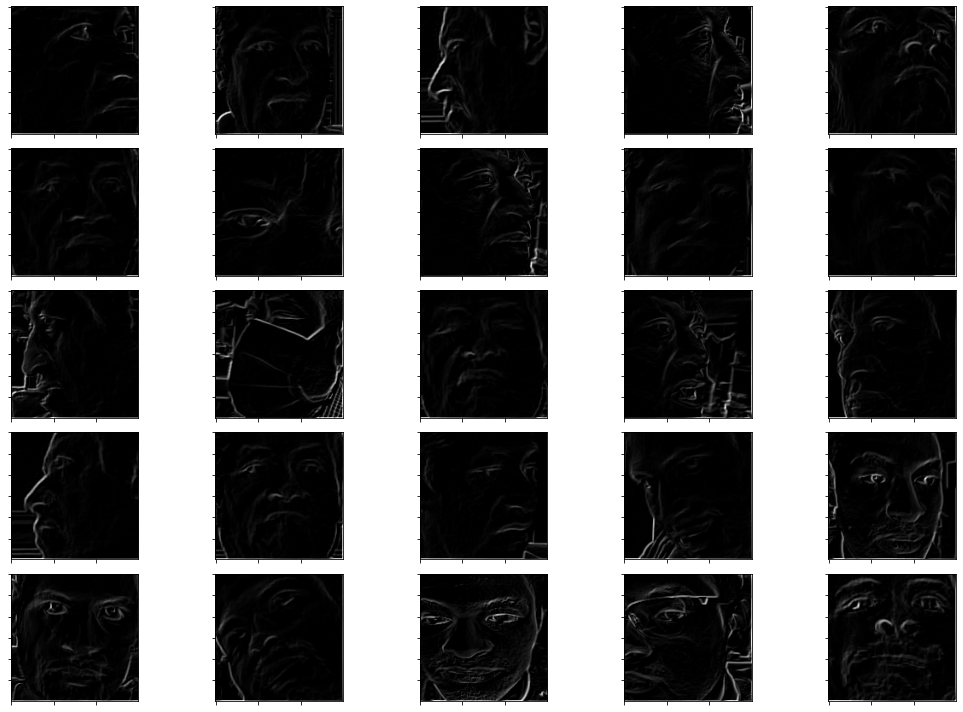

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4])

In [ ]:
Imprimir_Imagenes(Imagenes_por_Clase_Entrenamiento[40000:40000+25],5,5)
Clases_Entrenamiento[40000:40000+25]

In [ ]:
Clases_Entrenamiento = one_hot_encode(Clases_Entrenamiento)

In [ ]:
Imagenes_por_Clase_Validacion = np.asarray(Imagenes_por_Clase_Validacion)
Clases_Validacion = np.asarray(Clases_Validacion)

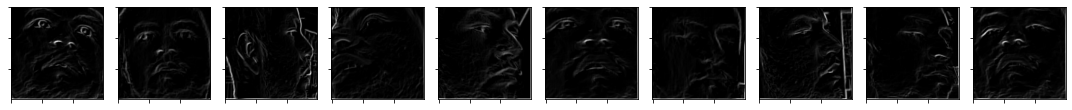

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
Imprimir_Imagenes(Imagenes_por_Clase_Validacion,1,10)
Clases_Validacion[:10]

In [ ]:
Clases_Validacion = one_hot_encode(Clases_Validacion)

In [ ]:
Clases_Validacion[:10]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
from keras import models
from keras import layers

width, height = 150,150

# Definimos nuestro modelo:

model = models.Sequential()

# Base Convolucional:

model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(width,height,1), strides=(1,1), 
                        padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=128, kernel_size=3, strides=1, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=256, kernel_size=3, strides=1, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same'))
model.add(layers.LeakyReLU(alpha=0.01))
model.add(layers.BatchNormalization())

# Comienza capa la capa clasificadora:

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512))
model.add(layers.LeakyReLU(alpha=0.01))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128))
model.add(layers.LeakyReLU(alpha=0.01))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0

In [ ]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-7c2e0b53-b3ec-6c6a-44a3-7dda021da91f)


In [ ]:
from keras import optimizers

model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.01), metrics=["acc"])

In [ ]:
from timeit import default_timer

start_time = default_timer()

history = model.fit(Imagenes_por_Clase_Entrenamiento, Clases_Entrenamiento, epochs=100, batch_size=64, 
          validation_data=(Imagenes_por_Clase_Validacion, Clases_Validacion))

print(f"Tiempo total de entrenamiento: {np.around((default_timer() - start_time)/60, decimals=4)} minutos.")

Epoch 1/100
782/782 [==============================] - 43s 55ms/step - loss: 0.4229 - acc: 0.8583 - val_loss: 0.2518 - val_acc: 0.9136
Epoch 2/100
782/782 [==============================] - 42s 54ms/step - loss: 0.1558 - acc: 0.9518 - val_loss: 0.7508 - val_acc: 0.7905
Epoch 3/100
782/782 [==============================] - 42s 53ms/step - loss: 0.1171 - acc: 0.9658 - val_loss: 0.3034 - val_acc: 0.8994
Epoch 4/100
782/782 [==============================] - 42s 53ms/step - loss: 0.0944 - acc: 0.9738 - val_loss: 0.6620 - val_acc: 0.7914
Epoch 5/100
782/782 [==============================] - 41s 53ms/step - loss: 0.0919 - acc: 0.9747 - val_loss: 0.1174 - val_acc: 0.9644
Epoch 6/100
782/782 [==============================] - 41s 53ms/step - loss: 0.0783 - acc: 0.9790 - val_loss: 2.9033 - val_acc: 0.5690
Epoch 7/100
782/782 [==============================] - 41s 53ms/step - loss: 0.0794 - acc: 0.9784 - val_loss: 0.1340 - val_acc: 0.9577
Epoch 8/100
782/782 [==============================] - 

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/TESIS/FM_Dataset/Clasificador_Bordes_100.h5")

In [ ]:
precision = history.history['acc']
validacion_precision = history.history["val_acc"]
perdida = history.history["loss"]
validacion_perdida = history.history["val_loss"]

epocas = range(1, len(precision) + 1, 1)

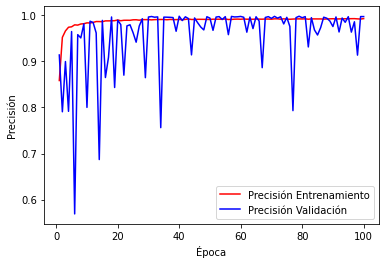

In [ ]:
plt.plot(epocas, precision, 'r', label="Precisión Entrenamiento")
plt.plot(epocas, validacion_precision, 'b', label="Precisión Validación")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.show()

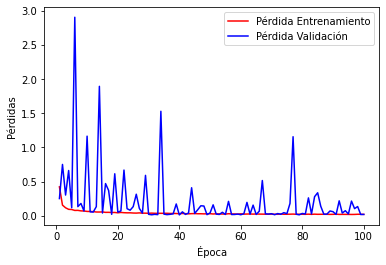

In [ ]:
plt.plot(epocas, perdida, 'r', label="Pérdida Entrenamiento")
plt.plot(epocas, validacion_perdida, 'b', label="Pérdida Validación")
plt.xlabel("Época")
plt.ylabel("Pérdidas")
plt.legend()
plt.show()

## Dado que la extracción de datos desde google drive entorpecia de sobre manera el entrenamiento de modelo, decidí cargar todos los datos en memoria RAM y partir de ahí, lo cual optimizo con disminuyo con creces el tiempo de entrenamiento del mismo. De tardar de manera estimada aproximadamente 20 días (extrayendo los datos desde drive), pasamos a tardar 1.13 horas.

***  

*2do modelo con bordes 30 épocas*


In [ ]:
from keras import models
from keras import layers

width, height = 150,150

# Definimos nuestro modelo:

model_B30 = models.Sequential()

# Base Convolucional:

model_B30.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(width,height,1), strides=(1,1), 
                        padding='same'))
model_B30.add(layers.BatchNormalization())
model_B30.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_B30.add(layers.Dropout(0.2))

model_B30.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', padding='same'))
model_B30.add(layers.BatchNormalization())
model_B30.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_B30.add(layers.Dropout(0.2))

model_B30.add(layers.Conv2D(filters=128, kernel_size=3, strides=1, activation='relu', padding='same'))
model_B30.add(layers.BatchNormalization())
model_B30.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_B30.add(layers.Dropout(0.2))

model_B30.add(layers.Conv2D(filters=256, kernel_size=3, strides=1, activation='relu', padding='same'))
model_B30.add(layers.BatchNormalization())
model_B30.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_B30.add(layers.Dropout(0.2))

model_B30.add(layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same'))
model_B30.add(layers.LeakyReLU(alpha=0.01))
model_B30.add(layers.BatchNormalization())

# Comienza capa la capa clasificadora:

model_B30.add(layers.Flatten())
model_B30.add(layers.Dropout(0.5))

model_B30.add(layers.Dense(512))
model_B30.add(layers.LeakyReLU(alpha=0.01))
model_B30.add(layers.BatchNormalization())
model_B30.add(layers.Dropout(0.5))

model_B30.add(layers.Dense(128))
model_B30.add(layers.LeakyReLU(alpha=0.01))
model_B30.add(layers.BatchNormalization())
model_B30.add(layers.Dropout(0.5))

model_B30.add(layers.Dense(5, activation='softmax'))

In [ ]:
from keras import optimizers

model_B30.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.01), metrics=["acc"])

In [ ]:
from timeit import default_timer

start_time = default_timer()

history = model_B30.fit(Imagenes_por_Clase_Entrenamiento, Clases_Entrenamiento, epochs=30, batch_size=64, 
          validation_data=(Imagenes_por_Clase_Validacion, Clases_Validacion))

print(f"Tiempo total de entrenamiento: {np.around((default_timer() - start_time)/60, decimals=4)} minutos.")

Epoch 1/30
782/782 [==============================] - 42s 54ms/step - loss: 0.4381 - acc: 0.8531 - val_loss: 1.2733 - val_acc: 0.6590
Epoch 2/30
782/782 [==============================] - 42s 53ms/step - loss: 0.1647 - acc: 0.9498 - val_loss: 0.2053 - val_acc: 0.9354
Epoch 3/30
782/782 [==============================] - 42s 54ms/step - loss: 0.1224 - acc: 0.9652 - val_loss: 1.5107 - val_acc: 0.6812
Epoch 4/30
782/782 [==============================] - 42s 53ms/step - loss: 0.0993 - acc: 0.9718 - val_loss: 0.5375 - val_acc: 0.8715
Epoch 5/30
782/782 [==============================] - 41s 53ms/step - loss: 0.0890 - acc: 0.9754 - val_loss: 0.0575 - val_acc: 0.9830
Epoch 6/30
782/782 [==============================] - 41s 53ms/step - loss: 0.0834 - acc: 0.9774 - val_loss: 0.0546 - val_acc: 0.9825
Epoch 7/30
782/782 [==============================] - 41s 53ms/step - loss: 0.0791 - acc: 0.9791 - val_loss: 0.1679 - val_acc: 0.9486
Epoch 8/30
782/782 [==============================] - 41s 53ms

In [ ]:
model_B30.save("/content/drive/MyDrive/Colab Notebooks/TESIS/FM_Dataset/Clasificador_Bordes_30.h5")

In [ ]:
precision = history.history['acc']
validacion_precision = history.history["val_acc"]
perdida = history.history["loss"]
validacion_perdida = history.history["val_loss"]

epocas = range(1, len(precision) + 1, 1)

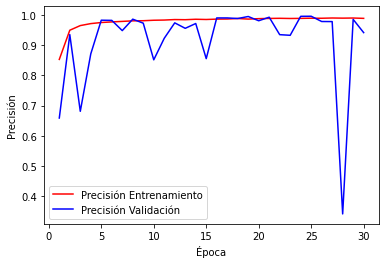

In [ ]:
plt.plot(epocas, precision, 'r', label="Precisión Entrenamiento")
plt.plot(epocas, validacion_precision, 'b', label="Precisión Validación")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.show()

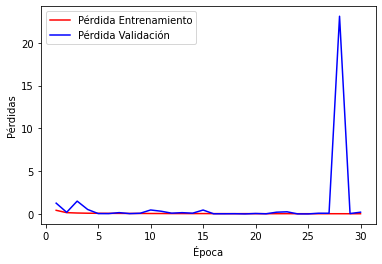

In [ ]:
plt.plot(epocas, perdida, 'r', label="Pérdida Entrenamiento")
plt.plot(epocas, validacion_perdida, 'b', label="Pérdida Validación")
plt.xlabel("Época")
plt.ylabel("Pérdidas")
plt.legend()
plt.show()

*** 
*2do modelo con bordes, 15 épocas*

In [ ]:
from keras import models
from keras import layers

width, height = 150,150

# Definimos nuestro modelo:

model_15 = models.Sequential()

# Base Convolucional:

model_15.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(width,height,1), strides=(1,1), 
                        padding='same'))
model_15.add(layers.BatchNormalization())
model_15.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_15.add(layers.Dropout(0.2))

model_15.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', padding='same'))
model_15.add(layers.BatchNormalization())
model_15.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_15.add(layers.Dropout(0.2))

model_15.add(layers.Conv2D(filters=128, kernel_size=3, strides=1, activation='relu', padding='same'))
model_15.add(layers.BatchNormalization())
model_15.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_15.add(layers.Dropout(0.2))

model_15.add(layers.Conv2D(filters=256, kernel_size=3, strides=1, activation='relu', padding='same'))
model_15.add(layers.BatchNormalization())
model_15.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_15.add(layers.Dropout(0.2))

model_15.add(layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same'))
model_15.add(layers.LeakyReLU(alpha=0.01))
model_15.add(layers.BatchNormalization())

# Comienza capa la capa clasificadora:

model_15.add(layers.Flatten())
model_15.add(layers.Dropout(0.5))

model_15.add(layers.Dense(512))
model_15.add(layers.LeakyReLU(alpha=0.01))
model_15.add(layers.BatchNormalization())
model_15.add(layers.Dropout(0.5))

model_15.add(layers.Dense(128))
model_15.add(layers.LeakyReLU(alpha=0.01))
model_15.add(layers.BatchNormalization())
model_15.add(layers.Dropout(0.5))

model_15.add(layers.Dense(5, activation='softmax'))

In [ ]:
from keras import optimizers

model_15.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.01), metrics=["acc"])

In [ ]:
from timeit import default_timer

start_time = default_timer()

history = model_15.fit(Imagenes_por_Clase_Entrenamiento, Clases_Entrenamiento, epochs=15, batch_size=64, 
          validation_data=(Imagenes_por_Clase_Validacion, Clases_Validacion))

print(f"Tiempo total de entrenamiento: {np.around((default_timer() - start_time)/3600, decimals=4)} horas.")

In [ ]:
model_15.save("/content/drive/MyDrive/Colab Notebooks/TESIS/FM_Dataset/Clasificador_Bordes_15.h5")

In [ ]:
precision = history.history['acc']
validacion_precision = history.history["val_acc"]
perdida = history.history["loss"]
validacion_perdida = history.history["val_loss"]

epocas = range(1, len(precision) + 1, 1)

In [ ]:
plt.plot(epocas, precision, 'r', label="Precisión Entrenamiento")
plt.plot(epocas, validacion_precision, 'b', label="Precisión Validación")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.show()

In [ ]:
plt.plot(epocas, perdida, 'r', label="Pérdida Entrenamiento")
plt.plot(epocas, validacion_perdida, 'b', label="Pérdida Validación")
plt.xlabel("Época")
plt.ylabel("Pérdidas")
plt.legend()
plt.show()

***
*3er modelo con bordes, 1000 épocas*

In [ ]:
from keras import models
from keras import layers

width, height = 150,150

# Definimos nuestro modelo:

model_BD1000 = models.Sequential()

# Base Convolucional:

model_BD1000.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(width,height,1), strides=(1,1), 
                        padding='same'))
model_BD1000.add(layers.BatchNormalization())
model_BD1000.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_BD1000.add(layers.Dropout(0.2))

model_BD1000.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', padding='same'))
model_BD1000.add(layers.BatchNormalization())
model_BD1000.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_BD1000.add(layers.Dropout(0.2))

model_BD1000.add(layers.Conv2D(filters=128, kernel_size=3, strides=1, activation='relu', padding='same'))
model_BD1000.add(layers.BatchNormalization())
model_BD1000.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_BD1000.add(layers.Dropout(0.2))

model_BD1000.add(layers.Conv2D(filters=256, kernel_size=3, strides=1, activation='relu', padding='same'))
model_BD1000.add(layers.BatchNormalization())
model_BD1000.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_BD1000.add(layers.Dropout(0.2))

model_BD1000.add(layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same'))
model_BD1000.add(layers.LeakyReLU(alpha=0.01))
model_BD1000.add(layers.BatchNormalization())

# Comienza capa la capa clasificadora:

model_BD1000.add(layers.Flatten())
model_BD1000.add(layers.Dropout(0.5))

model_BD1000.add(layers.Dense(512))
model_BD1000.add(layers.LeakyReLU(alpha=0.01))
model_BD1000.add(layers.BatchNormalization())
model_BD1000.add(layers.Dropout(0.5))

model_BD1000.add(layers.Dense(128))
model_BD1000.add(layers.LeakyReLU(alpha=0.01))
model_BD1000.add(layers.BatchNormalization())
model_BD1000.add(layers.Dropout(0.5))

model_BD1000.add(layers.Dense(5, activation='softmax'))

In [ ]:
from keras import optimizers

model_BD1000.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.01), metrics=["acc"])

In [ ]:
from timeit import default_timer

start_time = default_timer()

history = model_BD1000.fit(Imagenes_por_Clase_Entrenamiento, Clases_Entrenamiento, epochs=1000, batch_size=64, 
          validation_data=(Imagenes_por_Clase_Validacion, Clases_Validacion))

print(f"Tiempo total de entrenamiento: {np.around((default_timer() - start_time)/3600, decimals=4)} horas.")

In [ ]:
model_BD1000.save("/content/drive/MyDrive/Colab Notebooks/TESIS/FM_Dataset/Clasificador_Bordes_1000.h5")

In [ ]:
precision = history.history['acc']
validacion_precision = history.history["val_acc"]
perdida = history.history["loss"]
validacion_perdida = history.history["val_loss"]

epocas = range(1, len(precision) + 1, 1)

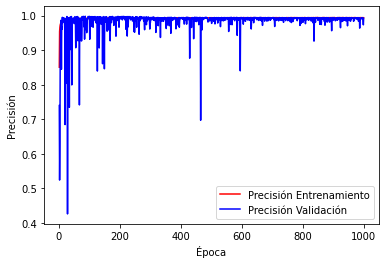

In [ ]:
plt.plot(epocas, precision, 'r', label="Precisión Entrenamiento")
plt.plot(epocas, validacion_precision, 'b', label="Precisión Validación")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.show()

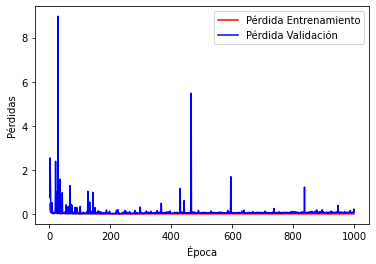

In [ ]:
plt.plot(epocas, perdida, 'r', label="Pérdida Entrenamiento")
plt.plot(epocas, validacion_perdida, 'b', label="Pérdida Validación")
plt.xlabel("Época")
plt.ylabel("Pérdidas")
plt.legend()
plt.show()

In [ ]:
2+2

4

***

***2da propuesta***

## FOTOS EN ESCALA DE GRISES:

In [ ]:
import cv2

Clases_Entrenamiento = list()
Imagenes_por_Clase_Entrenamiento = list()

ruta_datos = "/content/drive/MyDrive/Colab Notebooks/TESIS/FM_Dataset/Entrenamiento/"
ruta_fotos_persona = os.listdir(ruta_datos)
ruta_fotos_persona.sort() # Se ordena de forma ascendente con el objetivo de que las etiquetas e imágenes coincidan entre conjuntos (Entrenamiento y Validación).

contador = 0

for clase, ruta_archivos_x_persona in zip([0,1,2,3,4],ruta_fotos_persona):
    
    ruta_frames = os.path.join(ruta_datos, ruta_archivos_x_persona)
    
    frames = os.listdir(ruta_frames)
    random.shuffle(frames)

    for frame in frames:
        
        img = cv2.imread(os.path.join(ruta_frames, frame)) # Recuperamos la imagen en formato BGR.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255.0 # Transformamos de BGR a Escala de Grises Y Normalizamos.
        Imagenes_por_Clase_Entrenamiento.append(img.reshape(img.shape[0],img.shape[1],1)) # Guardamos la imagen ya normalizada y consideramos la dimension channel.
        Clases_Entrenamiento.append(clase) # Guardamos su respectiva clase.
        contador += 1
        print(contador)

In [ ]:
import cv2

Clases_Validacion = list()
Imagenes_por_Clase_Validacion = list()
a = list()
b = list()

ruta_datos = "/content/drive/MyDrive/Colab Notebooks/TESIS/FM_Dataset/Validacion/"
ruta_fotos_persona = os.listdir(ruta_datos)
ruta_fotos_persona.sort() # Se ordena de forma ascendente con el objetivo de que las etiquetas e imágenes coincidan entre conjuntos (Entrenamiento y Validación).

contador = 0

for clase, ruta_archivos_x_persona in zip([0,1,2,3,4],ruta_fotos_persona):

  ruta_frames = os.path.join(ruta_datos, ruta_archivos_x_persona)
    
  frames = os.listdir(ruta_frames)
  random.shuffle(frames)

  for frame in frames:
    
    img = cv2.imread(os.path.join(ruta_frames, frame)) # Recuperamos la imagen en formato BGR.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255.0 # Transformamos de BGR a Escala de Grises.
    Imagenes_por_Clase_Validacion.append(img.reshape(img.shape[0],img.shape[1],1)) # Guardamos la imagen ya normalizada y consideramos la dimension channel.
    Clases_Validacion.append(clase) # Guardamos su respectiva clase.
    contador += 1
    print(contador)

In [ ]:
print(len(Imagenes_por_Clase_Entrenamiento))
print(len(Imagenes_por_Clase_Validacion))

50136
12518


## Etiquetas:

Dany = 0  
Diana = 1    
Mamá = 2  
Papá = 3    
Tripi = 4  

**NOTA:** COLAB RECUPERA LAS CARPETAS DE DRIVE EN EL ORDEN QUE SE LE ANTOJE

In [ ]:
Imagenes_por_Clase_Entrenamiento = np.asarray(Imagenes_por_Clase_Entrenamiento)
Clases_Entrenamiento = np.asarray(Clases_Entrenamiento)

In [ ]:
Imagenes_por_Clase_Validacion = np.asarray(Imagenes_por_Clase_Validacion)
Clases_Validacion = np.asarray(Clases_Validacion)

In [ ]:
def one_hot_encode(etiquetas):
    """Esta función nos arroja un vector one_hot para cada etiqueta."""
    
    cantidad_clases = len(set(etiquetas))
    vectores_OneHot = np.zeros(shape=(etiquetas.shape[0], cantidad_clases), dtype="float64")
    
    for i in range(vectores_OneHot.shape[0]):
        vectores_OneHot[i,etiquetas[i]] = 1
    return vectores_OneHot

In [ ]:
Clases_Entrenamiento = one_hot_encode(Clases_Entrenamiento)

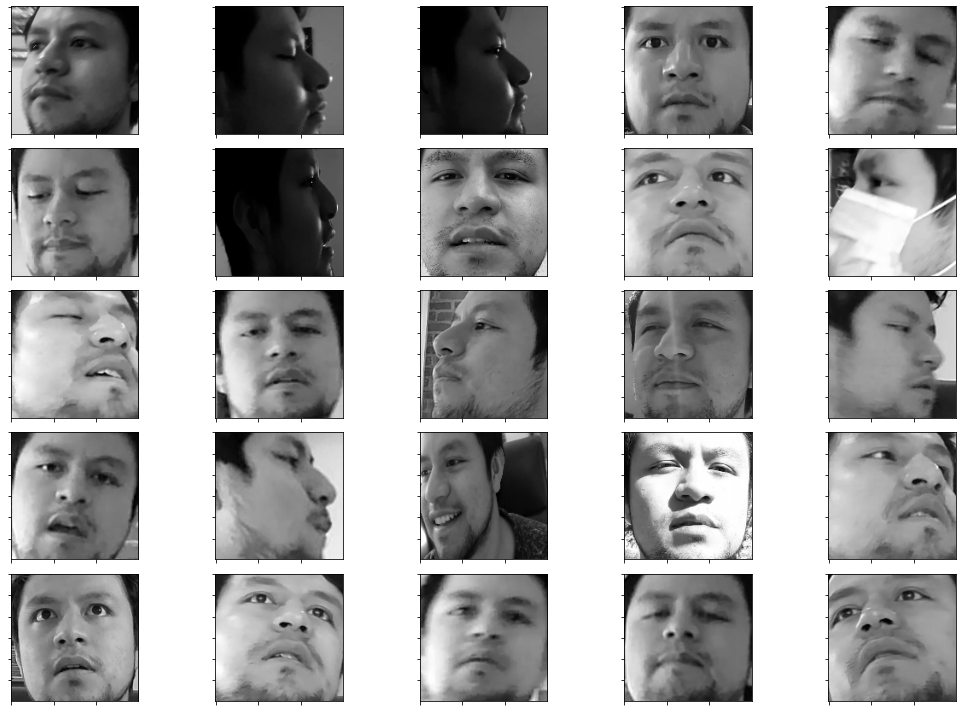

In [ ]:
Imprimir_Imagenes(Imagenes_por_Clase_Entrenamiento[:25],5,5)

In [ ]:
Clases_Entrenamiento[:25]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
Clases_Validacion = one_hot_encode(Clases_Validacion)

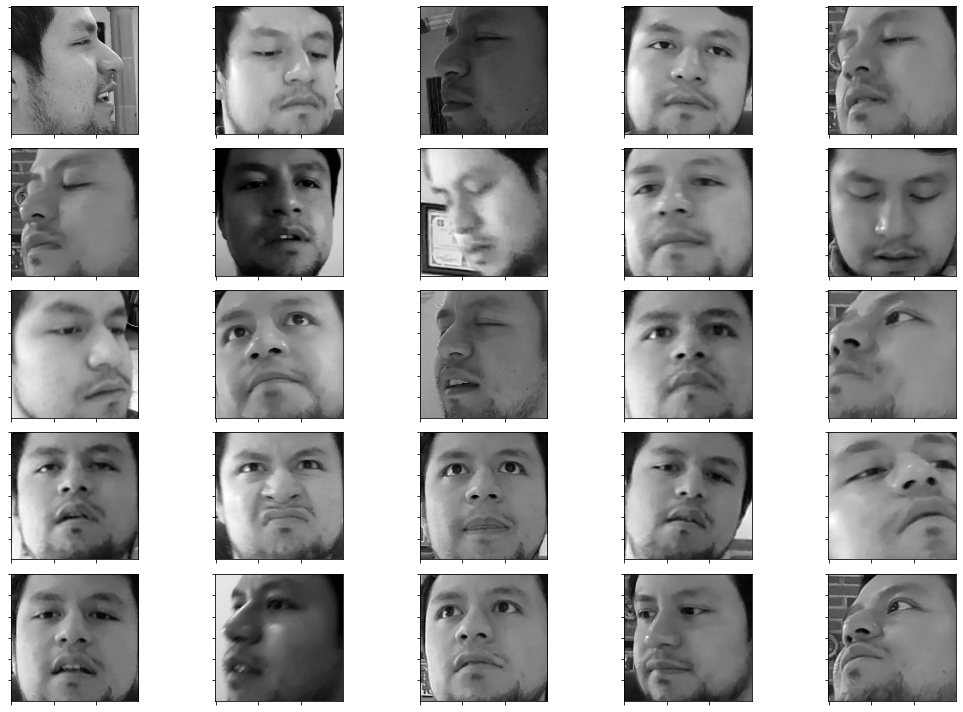

In [ ]:
Imprimir_Imagenes(Imagenes_por_Clase_Validacion[:25],5,5)

In [ ]:
Clases_Validacion[:25]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
from keras import models
from keras import layers

width, height = 150,150

# Definimos nuestro modelo:

model_EG = models.Sequential()

# Base Convolucional:

model_EG.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(width,height,1), strides=(1,1), 
                        padding='same'))
model_EG.add(layers.BatchNormalization())
model_EG.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_EG.add(layers.Dropout(0.2))

model_EG.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', padding='same'))
model_EG.add(layers.BatchNormalization())
model_EG.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_EG.add(layers.Dropout(0.2))

model_EG.add(layers.Conv2D(filters=128, kernel_size=3, strides=1, activation='relu', padding='same'))
model_EG.add(layers.BatchNormalization())
model_EG.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_EG.add(layers.Dropout(0.2))

model_EG.add(layers.Conv2D(filters=256, kernel_size=3, strides=1, activation='relu', padding='same'))
model_EG.add(layers.BatchNormalization())
model_EG.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_EG.add(layers.Dropout(0.2))

model_EG.add(layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same'))
model_EG.add(layers.LeakyReLU(alpha=0.01))
model_EG.add(layers.BatchNormalization())

# Comienza capa la capa clasificadora:

model_EG.add(layers.Flatten())
model_EG.add(layers.Dropout(0.5))

model_EG.add(layers.Dense(512))
model_EG.add(layers.LeakyReLU(alpha=0.01))
model_EG.add(layers.BatchNormalization())
model_EG.add(layers.Dropout(0.5))

model_EG.add(layers.Dense(128))
model_EG.add(layers.LeakyReLU(alpha=0.01))
model_EG.add(layers.BatchNormalization())
model_EG.add(layers.Dropout(0.5))

model_EG.add(layers.Dense(5, activation='softmax'))

In [ ]:
from keras import optimizers

model_EG.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.01), metrics=["acc"])

In [ ]:
from timeit import default_timer

start_time = default_timer()

history = model_EG.fit(Imagenes_por_Clase_Entrenamiento, Clases_Entrenamiento, epochs=30, batch_size=64, 
          validation_data=(Imagenes_por_Clase_Validacion, Clases_Validacion))

print(f"Tiempo total de entrenamiento: {np.around((default_timer() - start_time)/3600, decimals=4)} horas.")

Epoch 1/30
784/784 [==============================] - 43s 55ms/step - loss: 0.4493 - acc: 0.8450 - val_loss: 1.4402 - val_acc: 0.5744
Epoch 2/30
784/784 [==============================] - 42s 53ms/step - loss: 0.1561 - acc: 0.9481 - val_loss: 4.3603 - val_acc: 0.3935
Epoch 3/30
784/784 [==============================] - 42s 53ms/step - loss: 0.1065 - acc: 0.9654 - val_loss: 0.9702 - val_acc: 0.7310
Epoch 4/30
784/784 [==============================] - 42s 53ms/step - loss: 0.0807 - acc: 0.9744 - val_loss: 0.1008 - val_acc: 0.9663
Epoch 5/30
784/784 [==============================] - 42s 53ms/step - loss: 0.0659 - acc: 0.9791 - val_loss: 0.1092 - val_acc: 0.9652
Epoch 6/30
784/784 [==============================] - 42s 53ms/step - loss: 0.0551 - acc: 0.9830 - val_loss: 0.3110 - val_acc: 0.9100
Epoch 7/30
784/784 [==============================] - 42s 53ms/step - loss: 0.0543 - acc: 0.9827 - val_loss: 1.6233 - val_acc: 0.6584
Epoch 8/30
784/784 [==============================] - 42s 53ms

In [ ]:
model_EG.save("/content/drive/MyDrive/Colab Notebooks/TESIS/FM_Dataset/Clasificador_ESCALA_GRISES_30.h5")

In [ ]:
precision = history.history['acc']
validacion_precision = history.history["val_acc"]
perdida = history.history["loss"]
validacion_perdida = history.history["val_loss"]

epocas = range(1, len(precision) + 1, 1)

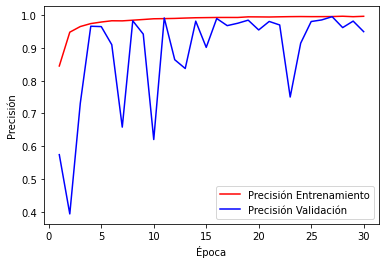

In [ ]:
plt.plot(epocas, precision, 'r', label="Precisión Entrenamiento")
plt.plot(epocas, validacion_precision, 'b', label="Precisión Validación")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.show()

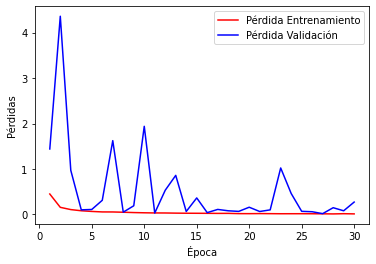

In [ ]:
plt.plot(epocas, perdida, 'r', label="Pérdida Entrenamiento")
plt.plot(epocas, validacion_perdida, 'b', label="Pérdida Validación")
plt.xlabel("Época")
plt.ylabel("Pérdidas")
plt.legend()
plt.show()

***  

*2do Modelo Escala de grises 100 épocas:*

In [ ]:
from keras import models
from keras import layers

width, height = 150,150

# Definimos nuestro modelo:

model_EG_100 = models.Sequential()

# Base Convolucional:

model_EG_100.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(width,height,1), strides=(1,1), 
                        padding='same'))
model_EG_100.add(layers.BatchNormalization())
model_EG_100.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_EG_100.add(layers.Dropout(0.2))

model_EG_100.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', padding='same'))
model_EG_100.add(layers.BatchNormalization())
model_EG_100.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_EG_100.add(layers.Dropout(0.2))

model_EG_100.add(layers.Conv2D(filters=128, kernel_size=3, strides=1, activation='relu', padding='same'))
model_EG_100.add(layers.BatchNormalization())
model_EG_100.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_EG_100.add(layers.Dropout(0.2))

model_EG_100.add(layers.Conv2D(filters=256, kernel_size=3, strides=1, activation='relu', padding='same'))
model_EG_100.add(layers.BatchNormalization())
model_EG_100.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))
model_EG_100.add(layers.Dropout(0.2))

model_EG_100.add(layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same'))
model_EG_100.add(layers.LeakyReLU(alpha=0.01))
model_EG_100.add(layers.BatchNormalization())

# Comienza capa la capa clasificadora:

model_EG_100.add(layers.Flatten())
model_EG_100.add(layers.Dropout(0.5))

model_EG_100.add(layers.Dense(512))
model_EG_100.add(layers.LeakyReLU(alpha=0.01))
model_EG_100.add(layers.BatchNormalization())
model_EG_100.add(layers.Dropout(0.5))

model_EG_100.add(layers.Dense(128))
model_EG_100.add(layers.LeakyReLU(alpha=0.01))
model_EG_100.add(layers.BatchNormalization())
model_EG_100.add(layers.Dropout(0.5))

model_EG_100.add(layers.Dense(5, activation='softmax'))

In [ ]:
from keras import optimizers

model_EG_100.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.01), metrics=["acc"])

In [ ]:
from timeit import default_timer

start_time = default_timer()

history = model_EG_100.fit(Imagenes_por_Clase_Entrenamiento, Clases_Entrenamiento, epochs=100, batch_size=64, 
          validation_data=(Imagenes_por_Clase_Validacion, Clases_Validacion))

print(f"Tiempo total de entrenamiento: {np.around((default_timer() - start_time)/60, decimals=4)} minutos.")

Epoch 1/100
784/784 [==============================] - 43s 55ms/step - loss: 0.4782 - acc: 0.8346 - val_loss: 1.0944 - val_acc: 0.6685
Epoch 2/100
784/784 [==============================] - 41s 53ms/step - loss: 0.1634 - acc: 0.9456 - val_loss: 1.7243 - val_acc: 0.5227
Epoch 3/100
784/784 [==============================] - 41s 53ms/step - loss: 0.1037 - acc: 0.9664 - val_loss: 1.5055 - val_acc: 0.6157
Epoch 4/100
784/784 [==============================] - 41s 53ms/step - loss: 0.0744 - acc: 0.9758 - val_loss: 0.8095 - val_acc: 0.8100
Epoch 5/100
784/784 [==============================] - 42s 53ms/step - loss: 0.0618 - acc: 0.9802 - val_loss: 2.7964 - val_acc: 0.5515
Epoch 6/100
784/784 [==============================] - 42s 53ms/step - loss: 0.0573 - acc: 0.9823 - val_loss: 0.3570 - val_acc: 0.9132
Epoch 7/100
784/784 [==============================] - 41s 53ms/step - loss: 0.0504 - acc: 0.9840 - val_loss: 0.7561 - val_acc: 0.7986
Epoch 8/100
784/784 [==============================] - 

In [ ]:
model_EG_100.save("/content/drive/MyDrive/Colab Notebooks/TESIS/FM_Dataset/Clasificador_ESCALA_GRISES_100.h5")

In [ ]:
precision = history.history['acc']
validacion_precision = history.history["val_acc"]
perdida = history.history["loss"]
validacion_perdida = history.history["val_loss"]

epocas = range(1, len(precision) + 1, 1)

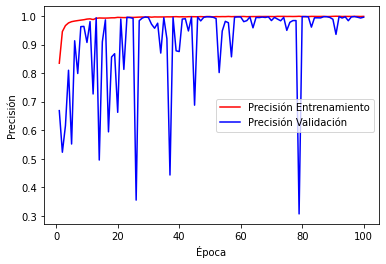

In [ ]:
plt.plot(epocas, precision, 'r', label="Precisión Entrenamiento")
plt.plot(epocas, validacion_precision, 'b', label="Precisión Validación")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.show()

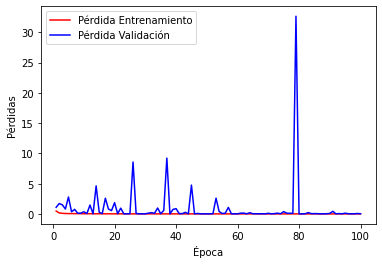

In [ ]:
plt.plot(epocas, perdida, 'r', label="Pérdida Entrenamiento")
plt.plot(epocas, validacion_perdida, 'b', label="Pérdida Validación")
plt.xlabel("Época")
plt.ylabel("Pérdidas")
plt.legend()
plt.show()